# Task 3: Forest Cover Type Classification (Level 2)

## Step 1: Load and Explore

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb

# Headers from UCI description
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points'] + [f'Wilderness_Area_{i}' for i in range(4)] + [f'Soil_Type_{i}' for i in range(40)] + ['Cover_Type']

# Load data, skip the first row (potential header), and set low_memory=False to avoid DtypeWarning
df = pd.read_csv('covertype.csv', header=None, names=columns, skiprows=1, low_memory=False)  

# Sample 10% to manage memory
df = df.sample(frac=0.1, random_state=42)

# Explore
print(df.head())
print(df['Cover_Type'].value_counts()) 
print(df.isnull().sum()) 

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
250728       3351     206     27                               726   
246788       2732     129      7                               212   
407714       2572      24      9                               201   
25713        2824      69     13                               417   
21820        2529      84      5                               120   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
250728                             124                             3813   
246788                               1                             1082   
407714                              25                              957   
25713                               39                             3223   
21820                                9                             1092   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
250728            192             252            180   
246788          

## Step 2: Split Data

In [7]:
# Features and target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type'] - 1  # Convert to 0-based indexing for XGBoost

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(X_train.shape, X_test.shape)  # Expect (~46,400, 54), (~11,600, 54)

(46480, 54) (11621, 54)


## Step 3: Train and Evaluate

Accuracy: 0.85


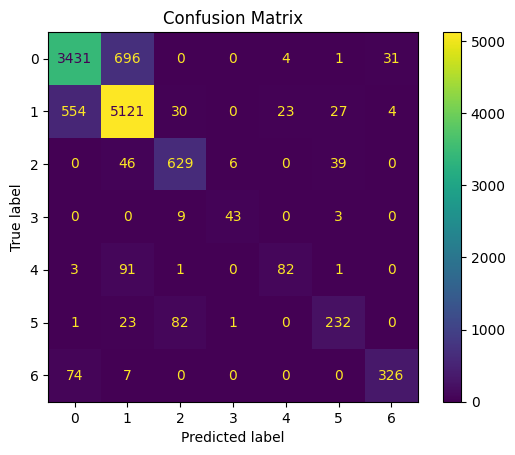

In [9]:
# Train XGBoost model
model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')  

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save for submission
plt.show()

## Bonus:Compare Random Forest

In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_acc}')

Random Forest Accuracy: 0.8725582996299802
